<a href="https://colab.research.google.com/github/tanisho1410/pikachu_image_classification/blob/main/chapter8_CNN%E5%9F%BA%E7%A4%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Dec 25 22:59:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    54W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"showtaniguchi","key":"a1515269eb434a8aca8ba158aef24b99"}'}

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [5]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 13s 4ms/step - loss: 0.1570 - accuracy: 0.9507
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0444 - accuracy: 0.9867
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0309 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0232 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0182 - accuracy: 0.9944


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0225 - accuracy: 0.9925
Test accuracy: 0.993


In [7]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:04<00:00, 211MB/s]
100% 812M/812M [00:04<00:00, 177MB/s]


In [11]:
!unzip -qq -p  train.zip

In [12]:
! os.path.isdir 'drive/My Drive/Colab Notebooks/dogs-vs-cats/train'

/bin/bash: os.path.isdir: command not found


In [13]:
dirpath_with_sep = 'drive/My Drive/Colab Notebooks/dogs-vs-cats/train/cat.0.jpg'
! os.path.isdir(dirpath_with_sep)

/bin/bash: -c: line 0: syntax error near unexpected token `dirpath_with_sep'
/bin/bash: -c: line 0: ` os.path.isdir(dirpath_with_sep)'


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import os, shutil, pathlib

original_dir = pathlib.Path("drive/My Drive/Colab Notebooks/dogs-vs-cats/train")
new_base_dir = pathlib.Path("drive/My Drive/cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [17]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [18]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [19]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1100 files belonging to 2 classes.
Found 2200 files belonging to 2 classes.


In [20]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [21]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [22]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [23]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [24]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [25]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 13s 181ms/step - loss: 0.7303 - accuracy: 0.5200 - val_loss: 0.6924 - val_accuracy: 0.5009
Epoch 2/30
63/63 [==============================] - 2s 28ms/step - loss: 0.7240 - accuracy: 0.5355 - val_loss: 0.6802 - val_accuracy: 0.5282
Epoch 3/30
63/63 [==============================] - 2s 27ms/step - loss: 0.6788 - accuracy: 0.5840 - val_loss: 0.6463 - val_accuracy: 0.6400
Epoch 4/30
63/63 [==============================] - 2s 26ms/step - loss: 0.6634 - accuracy: 0.6345 - val_loss: 0.6631 - val_accuracy: 0.6327
Epoch 5/30
63/63 [==============================] - 2s 27ms/step - loss: 0.6447 - accuracy: 0.6690 - val_loss: 0.6288 - val_accuracy: 0.6582
Epoch 6/30
63/63 [==============================] - 2s 27ms/step - loss: 0.5669 - accuracy: 0.7075 - val_loss: 0.6188 - val_accuracy: 0.6818
Epoch 7/30
63/63 [==============================] - 2s 26ms/step - loss: 0.5432 - accuracy: 0.7470 - val_loss: 0.5550 - val_accuracy: 0.7136
Epoch 8/30


Displaying curves of loss and accuracy during training

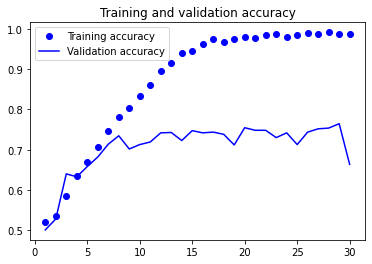

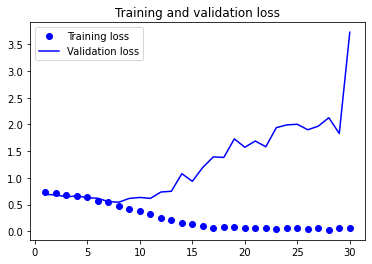

In [26]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Evaluating the model on the test set

In [27]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

69/69 [==============================] - 19s 227ms/step - loss: 0.5611 - accuracy: 0.7382
Test accuracy: 0.738


## **データ拡張**

In [28]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

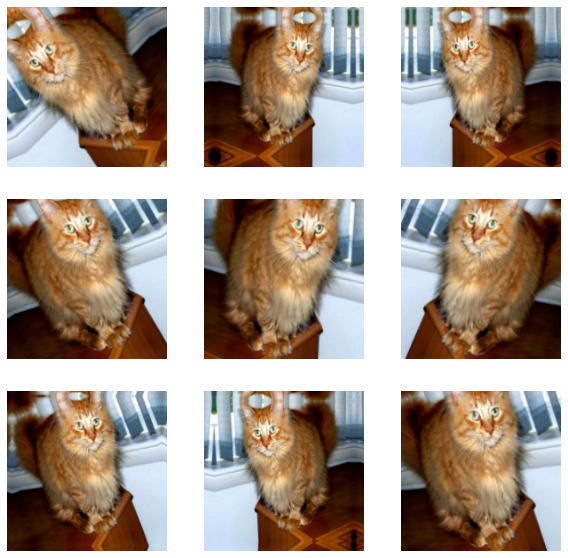

In [29]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [30]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [31]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 4s 45ms/step - loss: 0.7383 - accuracy: 0.5030 - val_loss: 0.6923 - val_accuracy: 0.5155
Epoch 2/100
63/63 [==============================] - 3s 42ms/step - loss: 0.6988 - accuracy: 0.5065 - val_loss: 0.6886 - val_accuracy: 0.5764
Epoch 3/100
63/63 [==============================] - 3s 42ms/step - loss: 0.6913 - accuracy: 0.5660 - val_loss: 0.6932 - val_accuracy: 0.5255
Epoch 4/100
63/63 [==============================] - 3s 45ms/step - loss: 0.6726 - accuracy: 0.6040 - val_loss: 0.6375 - val_accuracy: 0.6864
Epoch 5/100
63/63 [==============================] - 3s 42ms/step - loss: 0.6367 - accuracy: 0.6490 - val_loss: 0.6402 - val_accuracy: 0.6436
Epoch 6/100
63/63 [==============================] - 3s 43ms/step - loss: 0.6275 - accuracy: 0.6525 - val_loss: 0.5799 - val_accuracy: 0.6882
Epoch 7/100
63/63 [==============================] - 3s 42ms/step - loss: 0.6180 - accuracy: 0.6640 - val_loss: 0.6070 - val_accuracy: 0.6609
Epoch 

Evaluating the test model

In [32]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

69/69 [==============================] - 1s 15ms/step - loss: 0.3589 - accuracy: 0.8591
Test accuracy: 0.859


Leveraging a pretrained model

In [33]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [34]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

Fast feature extraction without data augmentation  
Extracting the VGG16 features and corresponding labels

In [35]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 393ms/step


In [36]:
train_features.shape

(2000, 5, 5, 512)

Defining and training the densely connected classifier

In [37]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 18.6920 - accuracy: 0.9185 - val_loss: 4.2035 - val_accuracy: 0.9682
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 2.9833 - accuracy: 0.9780 - val_loss: 3.6971 - val_accuracy: 0.9736
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 2.0664 - accuracy: 0.9860 - val_loss: 7.0800 - val_accuracy: 0.9618
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 0.9989 - accuracy: 0.9895 - val_loss: 5.4312 - val_accuracy: 0.9727
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 1.6643 - accuracy: 0.9900 - val_loss: 8.5050 - val_accuracy: 0.9636
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 1.1579 - accuracy: 0.9920 - val_loss: 4.9966 - val_accuracy: 0.9709
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.6282 - accuracy: 0.9935 - val_loss: 3.5943 - val_accuracy: 0.9782
Epoch 8/20
63/63 [=

Plotting the results

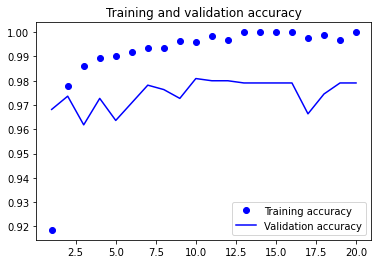

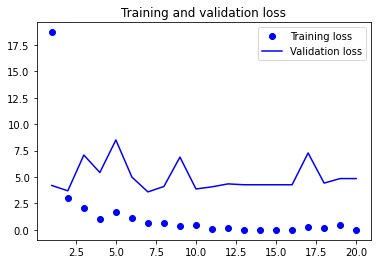

In [38]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Feature extraction together with data augmentation  

Instantiating and freezing the VGG16 convolutional base

In [39]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

Printing the list of trainable weights before and after freezing

In [40]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [41]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


Adding a data augmentation stage and a classifier to the convolutional base

In [42]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [43]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 5s 59ms/step - loss: 22.5938 - accuracy: 0.9015 - val_loss: 5.7124 - val_accuracy: 0.9609
Epoch 2/50
63/63 [==============================] - 4s 57ms/step - loss: 8.1411 - accuracy: 0.9385 - val_loss: 3.6036 - val_accuracy: 0.9773
Epoch 3/50
63/63 [==============================] - 3s 53ms/step - loss: 5.6508 - accuracy: 0.9630 - val_loss: 10.4486 - val_accuracy: 0.9509
Epoch 4/50
63/63 [==============================] - 4s 57ms/step - loss: 5.3564 - accuracy: 0.9580 - val_loss: 3.3358 - val_accuracy: 0.9782
Epoch 5/50
63/63 [==============================] - 3s 53ms/step - loss: 4.3870 - accuracy: 0.9655 - val_loss: 4.1949 - val_accuracy: 0.9764
Epoch 6/50
63/63 [==============================] - 3s 53ms/step - loss: 3.7816 - accuracy: 0.9700 - val_loss: 4.0942 - val_accuracy: 0.9809
Epoch 7/50
63/63 [==============================] - 4s 56ms/step - loss: 3.7230 - accuracy: 0.9690 - val_loss: 2.7722 - val_accuracy: 0.9800
Epoch 8/50


Evaluating the model on the test set

In [44]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

69/69 [==============================] - 2s 22ms/step - loss: 2.9159 - accuracy: 0.9768
Test accuracy: 0.977


## Fine-tuning a pretrained model

In [47]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

Freezing all layers until the fourth from the last

In [48]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

Fine-tuning the model

In [49]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 6s 62ms/step - loss: 0.4145 - accuracy: 0.9880 - val_loss: 2.5356 - val_accuracy: 0.9791
Epoch 2/30
63/63 [==============================] - 4s 59ms/step - loss: 0.4277 - accuracy: 0.9910 - val_loss: 2.0060 - val_accuracy: 0.9827
Epoch 3/30
63/63 [==============================] - 4s 58ms/step - loss: 0.4609 - accuracy: 0.9925 - val_loss: 1.6243 - val_accuracy: 0.9836
Epoch 4/30
63/63 [==============================] - 4s 55ms/step - loss: 0.4243 - accuracy: 0.9895 - val_loss: 1.6246 - val_accuracy: 0.9855
Epoch 5/30
63/63 [==============================] - 4s 55ms/step - loss: 0.2062 - accuracy: 0.9935 - val_loss: 1.6383 - val_accuracy: 0.9800
Epoch 6/30
63/63 [==============================] - 4s 55ms/step - loss: 0.3509 - accuracy: 0.9920 - val_loss: 1.8217 - val_accuracy: 0.9818
Epoch 7/30
63/63 [==============================] - 4s 55ms/step - loss: 0.4805 - accuracy: 0.9900 - val_loss: 1.7543 - val_accuracy: 0.9827
Epoch 8/30
63

In [50]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

69/69 [==============================] - 2s 22ms/step - loss: 1.7645 - accuracy: 0.9791
Test accuracy: 0.979
